In [63]:
import pandas as pd
df=pd.read_csv('matches.csv')



In [64]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [2]:
#checking null values
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [3]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.6+ KB


Text(0.5, 1.0, 'Toss-Win & Toss-Lose')

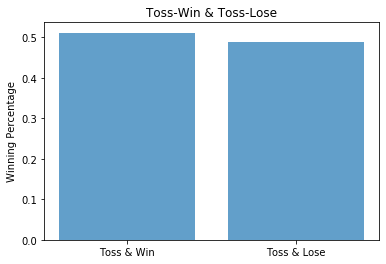

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
objects = ('Toss & Win','Toss & Lose')
y_pos = np.arange(len(objects))
a=len(df[df['toss_winner']==df['winner']])/len(df)
b=(len(df)-(len(df[df['toss_winner']==df['winner']])))/len(df)
performance = [a,b]
plt.bar(y_pos, performance, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Winning Percentage')
plt.title('Toss-Win & Toss-Lose')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fe4f890>,
      dtype=object)

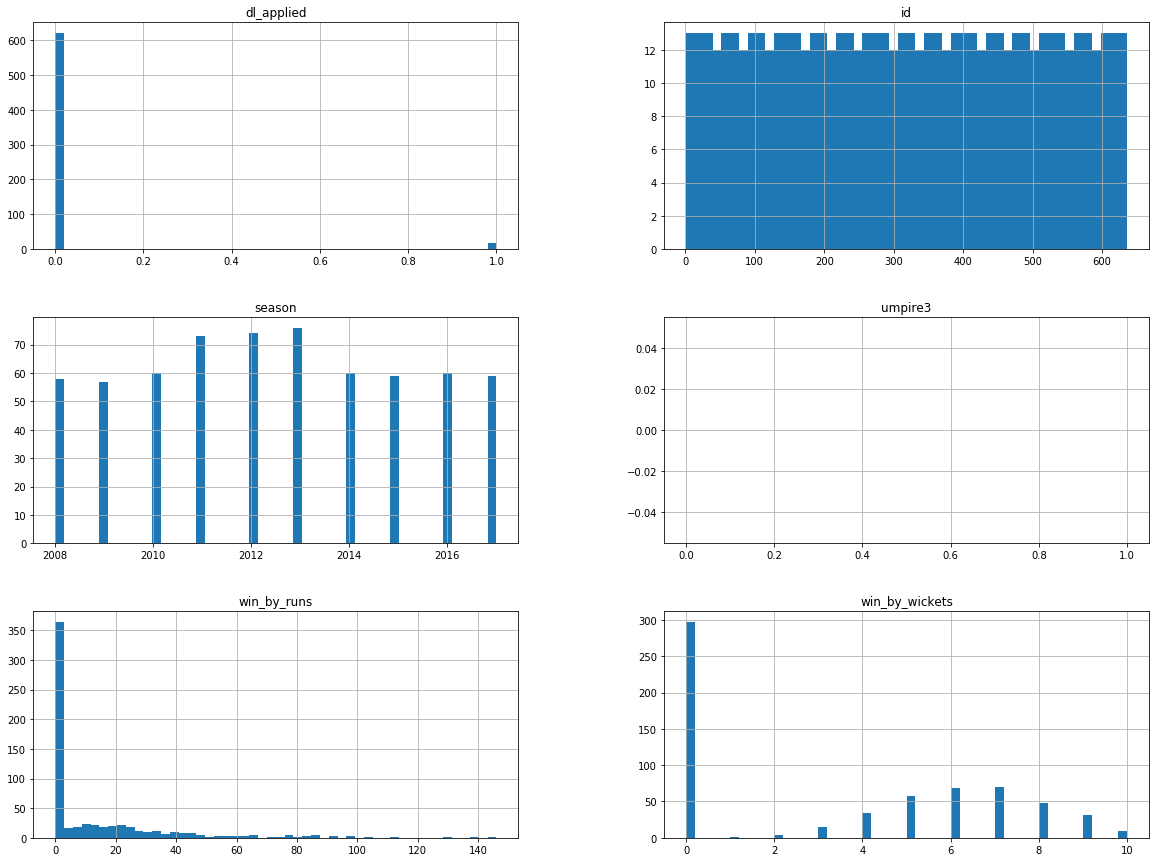

In [6]:
df.hist(bins=50,figsize=(20,15))

In [7]:
df[pd.isnull(df.winner)]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [8]:
#filling null values
df['winner'].fillna('Draw', inplace=True)
df['city'].fillna('Dubai', inplace=True)

In [9]:
df[df.winner=='Draw']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,Draw,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,Draw,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,Draw,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [10]:
df.loc[df.winner=='Draw','winner']

300    Draw
545    Draw
570    Draw
Name: winner, dtype: object

In [11]:
#Replacing Full names of the teams with their abbreviations 
df.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW'],inplace=True)

In [12]:
df.dtypes

id                   int64
season               int64
city                object
date                object
team1               object
team2               object
toss_winner         object
toss_decision       object
result              object
dl_applied           int64
winner              object
win_by_runs          int64
win_by_wickets       int64
player_of_match     object
venue               object
umpire1             object
umpire2             object
umpire3            float64
dtype: object

In [13]:
df['team1']=df.team1.astype('object')

In [14]:
df.dtypes


id                   int64
season               int64
city                object
date                object
team1               object
team2               object
toss_winner         object
toss_decision       object
result              object
dl_applied           int64
winner              object
win_by_runs          int64
win_by_wickets       int64
player_of_match     object
venue               object
umpire1             object
umpire2             object
umpire3            float64
dtype: object

In [15]:
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14},
           'toss_decision' : {'bat':1,'field':2 }}
df.replace(encode, inplace=True)

In [16]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,2,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,2,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,8,2,2,2,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,11,9,9,2,normal,0,9,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,3,7,3,1,normal,0,3,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [17]:
#Finding Co-relations among attributes
corrMatrix=df.corr()
corrMatrix.winner.sort_values(ascending=False)

winner            1.000000
team2             0.454009
team1             0.421931
toss_winner       0.361034
season            0.116276
toss_decision     0.069176
dl_applied        0.036798
id                0.023235
win_by_wickets    0.002463
win_by_runs      -0.084207
umpire3                NaN
Name: winner, dtype: float64

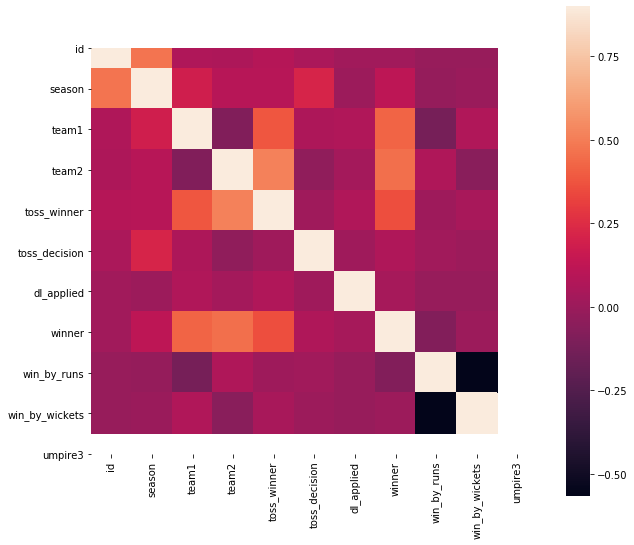

In [18]:
import seaborn as sns
fig = plt.figure(figsize = (10, 9))
sns.heatmap(corrMatrix, vmax = .9, square = True)
plt.show()

In [19]:
#Removing loosely co-related attributes with respect to winner
df.drop(['id','date','result','dl_applied','player_of_match','umpire1','umpire2','umpire3','win_by_runs','win_by_wickets'],axis=1,inplace=True)

In [52]:
df['toss_decision'].value_counts()

2    363
1    273
Name: toss_decision, dtype: int64

In [53]:
df.head()

,team1,team2,toss_winner,toss_decision,city,venue,winner
0,10,3,3,2,14,23,10
1,1,11,11,2,25,16,11
2,8,2,2,2,27,25,2
3,11,9,9,2,15,11,9
4,3,7,3,1,2,14,3


In [55]:
#Checking for null values
df.apply(lambda x: sum(x.isnull()),axis=0)

team1            0
team2            0
toss_winner      0
toss_decision    0
city             0
venue            0
winner           0
dtype: int64

In [56]:
#Encoding attributes value with sklearn
from sklearn.preprocessing import LabelEncoder
col_encode = ['city','venue']
l = LabelEncoder()
for i in col_encode:
    df[i] = l.fit_transform(df[i])
df.dtypes

team1            int64
team2            int64
toss_winner      int64
toss_decision    int64
city             int64
venue            int64
winner           int64
dtype: object

In [57]:
df.head()

,team1,team2,toss_winner,toss_decision,city,venue,winner
0,10,3,3,2,14,23,10
1,1,11,11,2,25,16,11
2,8,2,2,2,27,25,2
3,11,9,9,2,15,11,9
4,3,7,3,1,2,14,3


In [58]:
df.shape


(636, 7)

In [59]:
df.describe()

,team1,team2,toss_winner,toss_decision,city,venue,winner
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,5.540881,5.511006,5.371069,1.570755,13.836478,17.388365,5.309748
std,3.329169,3.341677,3.293140,0.495358,8.322533,9.550782,3.288726
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,3.000000,3.000000,2.000000,1.000000,7.000000,8.000000,2.000000
50%,5.000000,5.000000,5.000000,2.000000,14.000000,15.000000,5.000000
75%,9.000000,8.000000,7.250000,2.000000,22.000000,24.000000,8.000000
max,13.000000,13.000000,13.000000,2.000000,30.000000,34.000000,14.000000


In [60]:
#Train-Test Split
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df,test_size=0.2,random_state=42)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set:508
Rows in test set:128



In [28]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df['winner']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [29]:
strat_train_set['winner'].value_counts()

1     73
5     63
2     62
3     58
9     56
7     50
6     50
10    34
4     23
11    12
13    10
8     10
12     5
14     2
Name: winner, dtype: int64

In [61]:
ipl=strat_train_set.drop("winner",axis=1)
ipl_label=strat_train_set['winner'].copy()

# Modelling

In [65]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
model_1=LogisticRegression()
model_2=LinearSVC()
model_3=RandomForestClassifier()
model_1.fit(ipl,ipl_label)
model_2.fit(ipl,ipl_label)
model_3.fit(ipl,ipl_label)

df=df[['team1','team2','toss_winner','toss_decision','city','venue','winner']]

/Users/pawelpratyush/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pawelpratyush/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/pawelpratyush/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/pawelpratyush/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [66]:
df.head()

,team1,team2,toss_winner,toss_decision,city,venue,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Pune,Maharashtra Cricket Association Stadium,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Rajkot,Saurashtra Cricket Association Stadium,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Indore,Holkar Cricket Stadium,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore


In [34]:
some_data=ipl.iloc[:5]

In [35]:
some_labels=ipl_label.iloc[:5]

In [36]:
print(model_1.predict(some_data))
print(model_2.predict(some_data))
print(model_3.predict(some_data))

[3 2 2 9 5]
[7 7 7 7 7]
[ 5  2  3 10  6]


In [37]:
list(some_labels)

[5, 2, 3, 10, 6]

In [38]:
#evaluating the model
from sklearn.metrics import classification_report, accuracy_score
ipl_pred1=model_1.predict(ipl)
ipl_pred2=model_2.predict(ipl)
ipl_pred3=model_3.predict(ipl)
pred={'Logistic Regression':ipl_pred1,'Linear SVC':ipl_pred2,'Random Forest Tree':ipl_pred3}
for i,j in pred.items():
    print('Classifier Name:',i)
    n_accuracy=accuracy_score(ipl_label,j)
    n_report=classification_report(ipl_label,j)
    print('accuracy:',n_accuracy*100)
    print('Confusion matrix:\n',n_report)

Classifier Name: Logistic Regression
accuracy: 32.677165354330704
Confusion matrix:
               precision    recall  f1-score   support

           1       0.44      0.62      0.51        73
           2       0.38      0.45      0.41        62
           3       0.28      0.33      0.30        58
           4       0.00      0.00      0.00        23
           5       0.28      0.40      0.33        63
           6       0.24      0.16      0.19        50
           7       0.32      0.20      0.25        50
           8       0.00      0.00      0.00        10
           9       0.27      0.41      0.33        56
          10       0.00      0.00      0.00        34
          11       0.45      0.42      0.43        12
          12       0.00      0.00      0.00         5
          13       0.50      0.30      0.37        10
          14       0.00      0.00      0.00         2

    accuracy                           0.33       508
   macro avg       0.23      0.23      0.22      

/Users/pawelpratyush/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:
#cross validation
import numpy as np
from sklearn.model_selection import cross_val_predict
scores=cross_val_predict(model_3,ipl,ipl_label,cv=10)

x=np.array(ipl_label)
n_accuracy=accuracy_score(x,scores)
n_accuracy

/Users/pawelpratyush/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.47244094488188976

In [40]:
%matplotlib inline

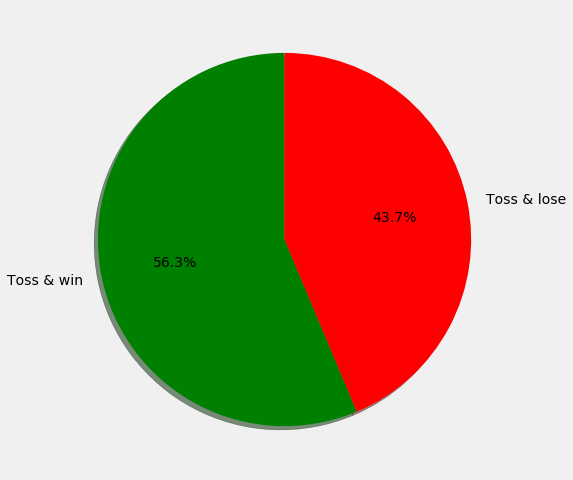

In [41]:
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
df_fil=df[df['toss_winner']==df['winner']]
slices=[len(df_fil),(577-len(df_fil))]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['g','r'])
fig = mlt.gcf()
fig.set_size_inches(8,8)
mlt.show()


# Evaluating the model


In [42]:
from sklearn.metrics import mean_squared_error
ipl_pred=model_3.predict(ipl)
mse=mean_squared_error(ipl_label,ipl_pred)
import numpy as np
rmse=np.sqrt(mse)
rmse

0.6018344659534288

# TESTING THE MODEL

In [43]:
#testing
X=test_set.drop('winner',axis=1)
Y=test_set['winner'].copy()
final_pred1=model_1.predict(X)
final_pred2=model_2.predict(X)
final_pred3=model_3.predict(X)
final_pred={'Logistic Regression':final_pred1,'Linear SVC':final_pred2,'Random Forest Tree':final_pred3}

for i,j in final_pred.items():
  test_accuracy=accuracy_score(Y,j)
  print('classifier name: {}:-\nAccuracy= {}'.format(i,test_accuracy*100))

classifier name: Logistic Regression:-
Accuracy= 38.28125
classifier name: Linear SVC:-
Accuracy= 7.03125
classifier name: Random Forest Tree:-
Accuracy= 89.0625


In [44]:
test_report=classification_report(Y,final_pred3)
print('For Random Forest\n'+ test_report)

For Random Forest
              precision    recall  f1-score   support

           1       0.88      1.00      0.94        15
           2       0.94      0.88      0.91        17
           3       0.87      0.76      0.81        17
           4       0.80      1.00      0.89         4
           5       0.95      0.91      0.93        22
           6       0.87      1.00      0.93        13
           7       0.73      0.89      0.80         9
           8       1.00      0.40      0.57         5
           9       0.92      0.92      0.92        13
          10       1.00      0.86      0.92         7
          11       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       0.50      1.00      0.67         1

    accuracy                           0.89       128
   macro avg       0.88      0.89      0.87       128
weighted avg       0.90      0.89      0.89       128



In [45]:
from sklearn.metrics import mean_squared_error
ipl_pred=model_3.predict(X)
mse=mean_squared_error(Y,ipl_pred)
import numpy as np
rmse=np.sqrt(mse)
rmse

1.3721561500062593